In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
titanic_data = sns.load_dataset('titanic')

## Checking the dataset

In [3]:
print(titanic_data.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

## Checking total number of passengers...

In [4]:
print('Total Passengers Travelled were: ' + str(len(titanic_data.index)))

Total Passengers Travelled were: 891


## Now Analyzing the data...

<AxesSubplot:xlabel='survived', ylabel='count'>

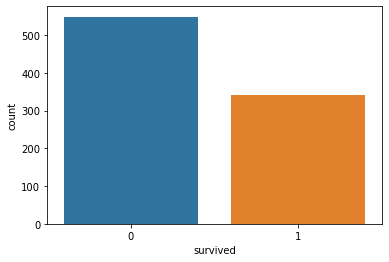

In [5]:
sns.countplot(x="survived", data = titanic_data)

## Checking for particular category in survivalness...

<AxesSubplot:xlabel='survived', ylabel='count'>

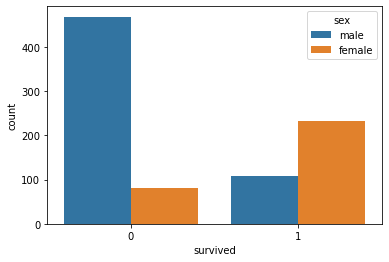

In [6]:
sns.countplot(x="survived", hue = "sex", data = titanic_data)

<AxesSubplot:xlabel='survived', ylabel='count'>

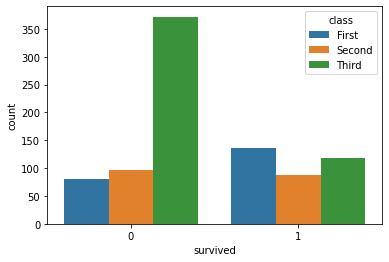

In [7]:
sns.countplot(x="survived", hue = "class", data = titanic_data)

## We will use pandas for plotting such categories which have large and variable data distribution (ex- age and fare)...

<AxesSubplot:ylabel='Frequency'>

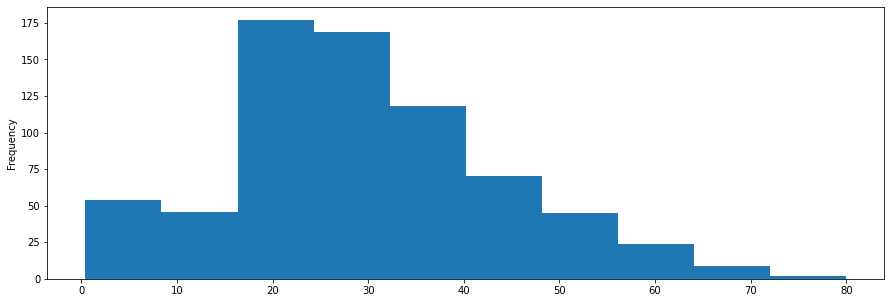

In [8]:
titanic_data['age'].plot.hist(figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

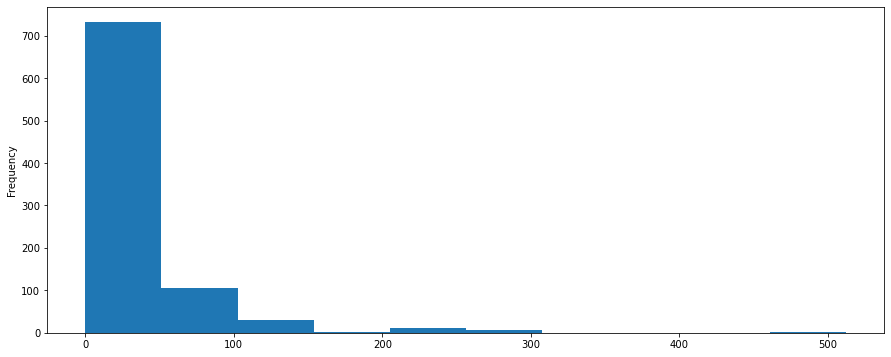

In [9]:
titanic_data['fare'].plot.hist(figsize=(15,6))

## Data wrangling...

In [10]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

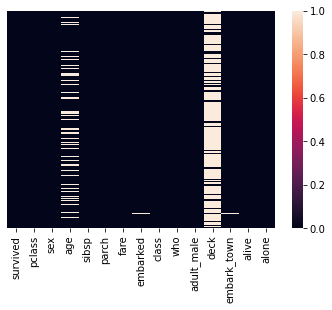

In [11]:
## ploting heatmap using seasborn
sns.heatmap(titanic_data.isnull(),yticklabels=False)

In [12]:
titanic_data.drop('deck',axis = 1, inplace=True)

In [13]:
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [14]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
titanic_data.dropna(axis = 1,inplace=True)

In [16]:
titanic_data.isnull().sum()

survived      0
pclass        0
sex           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

<AxesSubplot:>

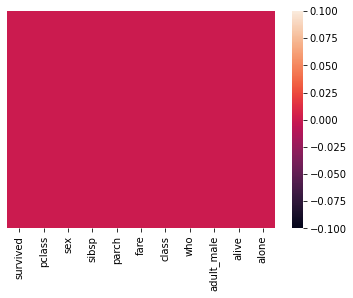

In [17]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

In [18]:
titanic_data.head(5)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


In [19]:
sx = pd.get_dummies(titanic_data['sex'], drop_first=True)


In [20]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   sibsp       891 non-null    int64   
 4   parch       891 non-null    int64   
 5   fare        891 non-null    float64 
 6   class       891 non-null    category
 7   who         891 non-null    object  
 8   adult_male  891 non-null    bool    
 9   alive       891 non-null    object  
 10  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(3)
memory usage: 58.6+ KB


In [21]:
pc = pd.get_dummies(titanic_data['pclass'], drop_first=True)

In [22]:
titanic_data = pd.concat([titanic_data,sx,pc],axis=1)

In [23]:
titanic_data.head(5)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone,male,2,3
0,0,3,male,1,0,7.2500,Third,man,True,no,False,1,0,1
1,1,1,female,1,0,71.2833,First,woman,False,yes,False,0,0,0
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True,0,0,1
3,1,1,female,1,0,53.1000,First,woman,False,yes,False,0,0,0
4,0,3,male,0,0,8.0500,Third,man,True,no,True,1,0,1


In [24]:
titanic_data.drop(['survived','pclass','sex','class'],axis=1,inplace=True)

In [25]:
titanic_data.head(5)

,sibsp,parch,fare,who,adult_male,alive,alone,male,2,3
0,1,0,7.2500,man,True,no,False,1,0,1
1,1,0,71.2833,woman,False,yes,False,0,0,0
2,0,0,7.9250,woman,False,yes,True,0,0,1
3,1,0,53.1000,woman,False,yes,False,0,0,0
4,0,0,8.0500,man,True,no,True,1,0,1


In [26]:
titanic_data.drop(['who','adult_male','alone'],axis=1,inplace=True)

In [27]:
titanic_data.head(5)

,sibsp,parch,fare,alive,male,2,3
0,1,0,7.2500,no,1,0,1
1,1,0,71.2833,yes,0,0,0
2,0,0,7.9250,yes,0,0,1
3,1,0,53.1000,yes,0,0,0
4,0,0,8.0500,no,1,0,1


In [28]:
surv = pd.get_dummies(titanic_data['alive'], drop_first=True)

In [29]:
titanic_data = pd.concat([titanic_data,surv],axis=1)

In [30]:
titanic_data.head(5)

,sibsp,parch,fare,alive,male,2,3,yes
0,1,0,7.2500,no,1,0,1,0
1,1,0,71.2833,yes,0,0,0,1
2,0,0,7.9250,yes,0,0,1,1
3,1,0,53.1000,yes,0,0,0,1
4,0,0,8.0500,no,1,0,1,0


In [31]:
titanic_data.drop(['alive'],axis=1,inplace = True)

In [32]:
titanic_data.head(5)

,sibsp,parch,fare,male,2,3,yes
0,1,0,7.2500,1,0,1,0
1,1,0,71.2833,0,0,0,1
2,0,0,7.9250,0,0,1,1
3,1,0,53.1000,0,0,0,1
4,0,0,8.0500,1,0,1,0


## Training and testing data_set

In [33]:
## creatring indepoendent and dependent variables respectively...
X = titanic_data.drop('yes',axis=1)
y = titanic_data['yes']

In [34]:
from sklearn.model_selection import train_test_split

## Spliting the data using train_test_split method from sklearn.model_selection

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.75,random_state = 10)

## Import LogisticRegression for making the model...

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression()

In [38]:
model.fit(X_train,y_train)

LogisticRegression()

In [39]:
predictions = model.predict(X_test)

## Checking the accuracy by accuracy_score attributes from sklearn.metrics...

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,predictions)

0.7922272047832586